#### Follow-up Analysis for Hacking for Defense<br/>Cyber Risk Management and Prioritization<br/>4/8/22

In [1]:
# Import necessary Python modules.
import pandas as pd
import missingno as miss
from plotnine import *
import numpy as np
import warnings

# Add additional settings to notebook.
warnings.filterwarnings("ignore")

In [2]:
# Read in the hypersonics contract data.
data_full = pd.read_csv("../data/Contract_HR001117C0025_Sub-Awards_1.csv")

In [3]:
# Exmine columns of interest.
data_interest = data_full[["prime_award_awarding_sub_agency_name", 
                           "prime_award_awarding_office_code", 
                           "prime_award_awarding_office_name",
                           "prime_award_funding_sub_agency_name",
                           "prime_award_funding_office_name",
                           "prime_awardee_dba_name",
                           "prime_awardee_parent_name",
                           "prime_awardee_business_types",
                           "prime_award_project_title",
                           "subaward_fsrs_report_year",
                           "subaward_fsrs_report_month",
                           "subaward_amount",
                           "subaward_action_date",
                           "subaward_action_date_fiscal_year",
                           "subawardee_dba_name",
                           "subawardee_name",
                           "subawardee_parent_name",
                           "subawardee_duns",
                           "subawardee_business_types",
                           "subaward_description"
                          ]]

In [4]:
# Collect variables to convert to categories.
cols_to_convert = pd.DataFrame({"columns" : data_interest.select_dtypes(include = ["int", "object"]).columns})

# Remove "subaward_amount" from columns to convert and make into list to push into for loop.
cols_to_convert = cols_to_convert[~cols_to_convert["columns"].str.contains("amount")]["columns"].values.tolist()

In [5]:
# Convert variables to categories.
for column in cols_to_convert:
    data_interest[column] = data_interest[column].astype("category")

In [6]:
# Break *subaward_amount* into categories.

# Identify the maximum *subaward_amount* in the data.
max_value = data_interest.loc[data_interest["subaward_amount"] > 0, "subaward_amount"].max()

# Split into 5 bins.
bins = np.linspace(0, max_value, 6).round(0)

# Create array of lower bounds for bins.
lower_bins = np.insert(bins, 0, 0)

# Create array for uppder bounds for bins.
upper_bins = np.insert(bins, 5, np.Inf)

# Create dataframe to show the bounds for the bins.
pd.DataFrame({"Lower Bin Bound" : lower_bins,
              "Upper Bin Bound" : upper_bins
             }).loc[1:5, :].reset_index().drop(columns = ["index"])

,Lower Bin Bound,Upper Bin Bound
0,0.0,12539364.0
1,12539364.0,25078728.0
2,25078728.0,37618093.0
3,37618093.0,50157457.0
4,50157457.0,inf


In [7]:
# First bin.
bin_0 = bins[1]

# Second bin.
bin_1 = bins[2]

# Third bin.
bin_2 = bins[3]

# Fourth bin.
bin_3 = bins[4]

# Fifth bin.
bin_4 = bins[5]

In [8]:
# We create the categorical variable for *subaward_amount*.
data_interest["subaward_amount_cat"] = \
np.where(data_interest["subaward_amount"] <= bin_0, 0,
         np.where((data_interest["subaward_amount"] > bin_0) & \
                  (data_interest["subaward_amount"] <= bin_1), 1,
                  np.where((data_interest["subaward_amount"] > bin_1) & \
                           (data_interest["subaward_amount"] <= bin_2), 2,
                           np.where((data_interest["subaward_amount"] > bin_2) & \
                                    (data_interest["subaward_amount"] <= bin_3), 3, 
                                    np.where((data_interest["subaward_amount"] > bin_3) & \
                                             (data_interest["subaward_amount"] <= bin_4), 4, 5)))))

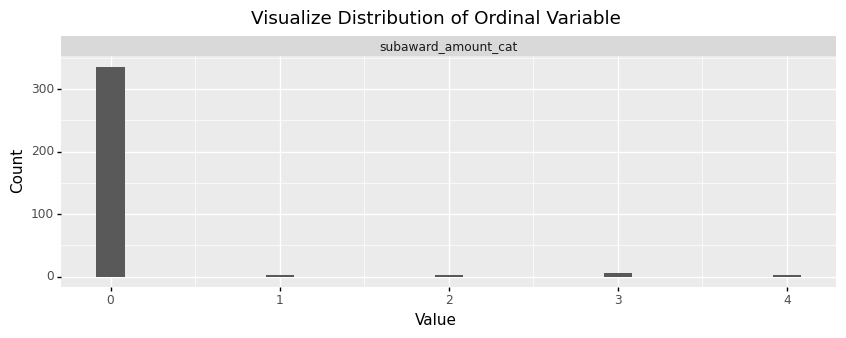

<ggplot: (8776539994477)>

In [9]:
# Plot the ordinal variable to observe the distribution.

# Identify the continuous variables.
data_interest_ord = data_interest.loc[:, data_interest.columns.str.endswith("_cat")].melt()

# Plot the ordinal variables.
(
    ggplot(data_interest_ord, aes(x = "value")) +
    geom_histogram(bins = 25) +
    facet_wrap("variable", scales = "free") +
    theme(figure_size = (10, 3),
          subplots_adjust = {"wspace" : 0.25}) +
    labs(x = "Value", y = "Count", title = "Visualize Distribution of Ordinal Variable")
)

In [10]:
# Collect companies that do not have a parent.
data_interest_no_parent = data_interest[data_interest["subawardee_parent_name"].isna()]

In [11]:
# View number of observations that do not have a parent.
data_interest_no_parent.shape

(105, 21)

In [12]:
# Collect companies that do have a parent.
data_interest_parent = data_interest[~data_interest["subawardee_parent_name"].isnull()]

In [13]:
# View number of observations that do have a parent.
data_interest_parent.shape

(243, 21)

In [14]:
# First analysis: average and count of aubaward amount by type of subawarded description for companies with no parent.
analysis_1 = \
(data_interest_no_parent[["subaward_description", "subaward_amount"]]
 .groupby(["subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Award Description", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
 .dropna()
)

# Show results.
display(analysis_1)

,Sub-Award Description,Sub-Award Average Amount,Sub-Award Count
1,"Accelerometers, Amplifiers, Cable/CableAssyHV,...",61572908.00,2
4,"Alum Invest Casting, NRE - Engineering, NRE - ...",33150000.00,2
5,Amplifiers.,22205895.00,1
6,"Bolts, Launchers&Cannisters.",16100000.00,2
8,"CableAssy&HarnMulti, NRE - Other.",2506723.50,2
10,"Chargers, Lithium Batteries, NRE - Other.",2162556.00,2
11,"Clamps, Non-complex Machined, Protect&Dust Cov...",1970054.00,2
12,"Clamps, Washers.",1935479.00,2
14,Cost Plus Fixed Fee,739951.00,4
16,"Custom CCA's, NRE - Other.",504258.50,2


In [15]:
# Second analysis: average and count of aubaward amount by type of subawarded description for companies with a parent.
analysis_2 = \
(data_interest_parent[["subaward_description", "subaward_amount"]]
 .groupby(["subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Award Description", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
 .dropna()
)

# Show results.
display(analysis_2)

,Sub-Award Description,Sub-Award Average Amount,Sub-Award Count
2,"Accelerometers, CableMulticonductor.",54400000.00,2
0,"AC-DC Power Supplies, Adaptors, Backshells, Ca...",48800000.00,2
3,"AlarmBuzzerSensor, EnvTestEq(Shock/etc).",41600000.00,2
7,"Cable Assemblies RF, CableAssy&HarnMulti, NRE ...",7000000.00,2
8,"CableAssy&HarnMulti, NRE - Other.",3996510.20,5
9,CableAssy&HarnMulti.,2342479.50,2
13,Composites.,1715276.00,2
14,Cost Plus Fixed Fee,899202.05,19
15,"Couplers, Gen Structural Assys, NRE - Other, N...",602298.00,2
16,"Custom CCA's, NRE - Other.",524390.25,4


In [16]:
# Third analysis: average and count of subaward amount by company with no parent.
analysis_3 = \
(data_interest_no_parent[["subawardee_name", "subaward_amount"]]
 .groupby(["subawardee_name"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Awardee Name",
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   })
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
 .dropna()
)

# Show results.
display(analysis_3)

,Sub-Awardee Name,Sub-Award Average Amount,Sub-Award Count
27,DYTRAN INSTRUMENTS INC.,48450570.33,3
77,"UNI-CAST, LLC",31200000.00,1
37,"HI-TECH MACHINING & ENGINEERING, L.L.C.",6488664.20,5
76,"UNI-CAST, INC.",4561624.75,8
16,"CICOIL, LLC",2506723.50,2
69,SPACE VECTOR CORPORATION,1498543.67,3
56,"PARALLEL VENTURES, INC.",1346780.00,3
6,ALLIANT TECHSYSTEMS OPERATIONS LLC,893366.00,1
40,"JANSEN'S AIRCRAFT SYSTEMS CONTROLS, INC.",448110.40,5
0,A. P. I. INCORPORATED,388847.58,12


In [17]:
# Fourth analysis: average and count of subaward amount by company with parent.
analysis_4 = \
(data_interest_parent[["subawardee_parent_name", "subaward_amount"]]
 .groupby(["subawardee_parent_name"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Awardee Parent Name",
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   })
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Average Amount", "Sub-Award Count"], ascending = False)
 .dropna()
)

# Show results.
display(analysis_4)

,Sub-Awardee Parent Name,Sub-Award Average Amount,Sub-Award Count
4,AMPHENOL CORPORATION,48800000.00,1
16,"DIVERSIFIED TECHNICAL SYSTEMS, INC.",48800000.00,1
53,"VISHAY PRECISION GROUP, INC.",48800000.00,1
38,MTS SYSTEMS CORPORATION,30053101.50,2
48,TE Connectivity Ltd.,10472334.38,8
18,Ducommun Incorporated,1761575.71,24
25,Etex,1176418.00,3
41,"ORBITAL ATK, INC.",858707.94,16
0,"AEROJET ROCKETDYNE HOLDINGS, INC.",467345.67,3
34,"L3HARRIS TECHNOLOGIES, INC.",410996.50,6


In [18]:
# Show all subawardee companies that have a different parent company.
analysis_5 = \
(data_interest[["subawardee_parent_name", "subawardee_name"]]
 .astype("str")
 .query("subawardee_parent_name != subawardee_name")
 .replace("nan", "")
 .drop_duplicates()
 .rename(columns = {"subawardee_parent_name" : "Sub-Awardee Parent Name",
                    "subawardee_name" : "Sub-Awardee Name"
                   })
 .sort_values(by = ["Sub-Awardee Parent Name", "Sub-Awardee Name"])
)

# Show results.
display(analysis_5)

,Sub-Awardee Parent Name,Sub-Awardee Name
28,,A. P. I. INCORPORATED
220,,"ADVANCED MATERIALS TECHNOLOGIES, LLC"
307,,"AEROSPEC, INC."
83,,ALLCOMP INC.
43,,ALLIANT TECHSYSTEMS OPERATIONS LLC
...,...,...
162,"TRIUMPH GROUP, INC.","TRIUMPH ENGINEERED SOLUTIONS, INC."
87,The Jordan Company L P,"ARCH GLOBAL PRECISION - HUNTINGDON VALLEY, LLC"
115,ULTRA ELECTRONICS HOLDINGS PLC,"HERLEY INDUSTRIES, INC."
4,"VISHAY PRECISION GROUP, INC.","DIVERSIFIED TECHNICAL SYSTEMS, INC."


***

#### Follow-up Analysis for Hacking for Defense<br/>Cyber Risk Management and Prioritization<br/>4/13/22

In [19]:
# Read in all subaward data.
data_sub_awards_all = \
(pd
 .read_csv("../data/All_Subawards_2022-04-12_H19M40S42878092/All_Contracts_Subawards_2022-04-12_H19M40S39_1.csv")
)

In [20]:
# Check size of all subaward data.
data_sub_awards_all.shape

(162207, 107)

#### Analyze Hypersonic Awards for CY 2021.

In [21]:
# Only collect hypersonic subawards.
data_sub_awards_hyper = \
data_sub_awards_all[(data_sub_awards_all["prime_award_description"]
                     .str
                     .lower()
                     .str
                     .contains("hypersonic", regex = False)
                    )]

In [22]:
# Identify the top 10 subaward descriptions for hypersonic.
top_descriptions_hyper = \
(data_sub_awards_hyper[["subaward_description", "subaward_amount"]]
 .groupby(["subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Award Description", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Count"], ascending = False)
 .dropna()
 .head(10)
)[["Sub-Award Description"]]

# Save to CSV.
top_descriptions_hyper.to_csv("results/h4d_subaward_top_hypersonic_descriptions.csv", index = False)

# Show results.
display(top_descriptions_hyper)

,Sub-Award Description
59,The contractor shall provide the following ser...
40,Material/ODC to support the requirement specif...
43,"ODC/MATERIAL to support TDO ""Hypersonic Threat..."
34,IMU
41,NRE - Other.
52,SERVICE PLASMA PROCESSES
51,SERVICE AAVID THERMACORE
11,AC355550N/720
1,3.1 Purchase and execute hardware/Software (HW...
39,MR&D MACH RULES SUBCONTRACT


In [23]:
# Merge all subaward data with the top descriptions for hypersonic.
data_top_descriptions_hyper = \
(data_sub_awards_hyper
 .merge(top_descriptions_hyper, how = "inner", left_on = "subaward_description", right_on = "Sub-Award Description")
)

In [24]:
# Collect results for the companies that have the most contracts for the top descriptions for hypersonic.
results_hyper = \
(data_top_descriptions_hyper[["subawardee_name", "subaward_description", "subaward_amount"]]
 .groupby(["subawardee_name", "subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["count"], ascending = False)
 .dropna()
 .head(10)
)

# Rename columns.
results_hyper.columns.values[0] = "Sub-Awardee Name"
results_hyper.columns.values[1] = "Sub-Awardee Description"
results_hyper.columns.values[2] = "Sub-Awardee Average Amount"
results_hyper.columns.values[3] = "Sub-Awardee Count"

# Save to CSV.
results_hyper.to_csv("results/h4d_subaward_top_hypersonic_companies.csv", index = False)

# Show results.
display(results_hyper)

,Sub-Awardee Name,Sub-Awardee Description,Sub-Awardee Average Amount,Sub-Awardee Count
10,MICROTECHNOLOGIES LLC,Material/ODC to support the requirement specif...,143478.27,9
11,OPTICAL SCIENCES CORPORATION,The contractor shall provide the following ser...,120992.96,9
2,"BLUEHALO, LLC",The contractor shall provide the following ser...,87993.80,6
14,"RADIANCE TECHNOLOGIES, INC.","ODC/MATERIAL to support TDO ""Hypersonic Threat...",55771.54,5
6,HONEYWELL INTERNATIONAL INC.,IMU,39442.88,4
0,"AAVID THERMACORE, INC.",SERVICE AAVID THERMACORE,326813.47,3
1,"AEGIS TECHNOLOGIES GROUP, LLC, THE",The contractor shall provide the following ser...,87993.80,3
13,"PLASMA PROCESSES, LLC",SERVICE PLASMA PROCESSES,296968.00,3
4,CORVID TECHNOLOGIES LLC,NRE - Other.,154168.00,2
7,"HYSONIC TECHNOLOGIES, LLC",NRE - Other.,99400.00,2


In [25]:
# Collect companies that do not have a parent for hypersonic.
data_sub_awards_hyper_no_parent = \
data_sub_awards_hyper[data_sub_awards_hyper["subawardee_parent_name"].isna()]

In [26]:
# Collect results for the companies that have the most contracts for hypersonic with no parent.
results_hyper_no_parent = \
(data_sub_awards_hyper_no_parent[["subawardee_name", "subaward_description", "subaward_amount"]]
 .groupby(["subawardee_name", "subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["count"], ascending = False)
 .dropna()
 .head(10)
)

# Rename columns.
results_hyper_no_parent.columns.values[0] = "Sub-Awardee Name"
results_hyper_no_parent.columns.values[1] = "Sub-Awardee Description"
results_hyper_no_parent.columns.values[2] = "Sub-Awardee Average Amount"
results_hyper_no_parent.columns.values[3] = "Sub-Awardee Count"

# Save to CSV.
results_hyper_no_parent.to_csv("results/h4d_subaward_top_hypersonic_companies_no_parent.csv", index = False)

# Show results.
display(results_hyper_no_parent)

,Sub-Awardee Name,Sub-Awardee Description,Sub-Awardee Average Amount,Sub-Awardee Count
18,OPTICAL SCIENCES CORPORATION,The contractor shall provide the following ser...,120992.96,9
23,"PLASMA PROCESSES, LLC",SERVICE PLASMA PROCESSES,296968.00,3
16,MATERIALS RESEARCH & DESIGN INC,MR&D MACH RULES SUBCONTRACT,374191.00,2
29,"TRI MODELS, INC.",Ground Test Article Ground Test Article (Live Fi,139452.46,2
13,"HYSONIC TECHNOLOGIES, LLC",NRE - Other.,99400.00,2
25,"REGAL TECHNOLOGY PARTNERS, INC.",HARNESS KIT WIRE HARNESS,36362.85,1
20,"PLASMA PROCESSES, LLC",A07922250-001 A07922245-001,150960.00,1
21,"PLASMA PROCESSES, LLC",A07922250-001A07922245-001,60900.00,1
22,"PLASMA PROCESSES, LLC",AC355550N/720,37950.00,1
24,"REGAL TECHNOLOGY PARTNERS, INC.",BACKSHELL BACKSHELL EMI/RFI BACKSHELL STRAIGH,111278.77,1


#### Analyze All Awards for CY 2021.

In [27]:
# Identify the top 10 subaward descriptions for all contracts.
top_descriptions_all = \
(data_sub_awards_all[["subaward_description", "subaward_amount"]]
 .groupby(["subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .rename(columns = {"" : "Sub-Award Description", 
                    "mean" : "Sub-Award Average Amount",
                    "count" : "Sub-Award Count"
                   }, level = 1)
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["Sub-Award Count"], ascending = False)
 .dropna()
 .head(10)
)[["Sub-Award Description"]].rename(columns = {"Sub-Award Description" : "description"})

# Save to CSV.
top_descriptions_all.to_csv("results/h4d_subaward_top_all_descriptions.csv", index = False)

# Show results.
display(top_descriptions_all)

,description
6771,Aircraft Parts and Service
28930,Material
17778,Electrical
16620,Driveline
61716,SUBCONTRACT COSTS
59377,Rolls-Royce awards subcontracts for production...
17233,ENGINEER. SERVICES
14385,Computer Programmers
59935,SEE COMPLETE DESCRIPTION
4929,AEROSPACE SUPPORT


In [28]:
# Merge all subaward data with the top descriptions for all contracts.
data_top_descriptions_all = \
(data_sub_awards_all
 .merge(top_descriptions_all, how = "inner", left_on = "subaward_description", right_on = "description")
)

In [29]:
# Collect results for the companies that have the most contracts for the top descriptions for all contracts.
results_all = \
(data_top_descriptions_all[["subawardee_name", "subaward_description", "subaward_amount"]]
 .groupby(["subawardee_name", "subaward_description"])
 .agg({
     "subaward_amount" : ["mean", "count"]
 })
 .reset_index()
 .round(2)
 .droplevel(0, axis = 1)
 .sort_values(by = ["count"], ascending = False)
 .dropna()
 .head(10)
)

# Rename columns.
results_all.columns.values[0] = "Sub-Awardee Name"
results_all.columns.values[1] = "Sub-Awardee Description"
results_all.columns.values[2] = "Sub-Awardee Average Amount"
results_all.columns.values[3] = "Sub-Awardee Count"

# Save to CSV.
results_all.to_csv("results/h4d_subaward_top_all_companies.csv", index = False)

# Show results.
display(results_all)

,Sub-Awardee Name,Sub-Awardee Description,Sub-Awardee Average Amount,Sub-Awardee Count
1457,"Thyssenkrupp Bilstein Of America, Inc.",Driveline,131495.56,243
715,"HYDRO ELECTRONIC DEVICES, INC.",Electrical,51088.31,181
369,COMTECH LLC,Computer Programmers,382774.19,126
232,BENDIX COMMERCIAL VEHICLE SYSTEMS LLC,Driveline,86893.17,122
691,"HERDT CONSULTING, INC.",Computer Programmers,203649.82,115
904,"MACHINE SERVICE, INC.",Driveline,144918.54,110
749,"INTEGRATED CABLE ASSEMBLY HOLDINGS, INC.",Electrical,57371.57,102
182,"AVTASK, INC.",AEROSPACE SUPPORT,34337.28,86
1212,ROUNDTABLE TECHNOLOGY LLC,Computer Programmers,382763.61,85
1074,PARKER-HANNIFIN CORPORATION,Rolls-Royce awards subcontracts for production...,209492.25,80
